<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: normal; font-size: 32px; color: #3366FF;'>Desafio Paraná Banco -</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'> Cientista de Dados Pleno</span>
</div>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Etapa 3: Desafio em Data Science</span>
</div>

<br><br>

<div style='color: #3366FF; text-align: center; font-size: 28px; font-weight: bold'>
  <p>
    Conteúdo desse Notebook
  </p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Recriação das variáveis</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Avaliar sazonalidade e estudar os resíduos das correlações</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Produção dos Modelos Arimas</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Avaliação do Train e Test utilizando RMSE</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Conclusão</p>
</div>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from utilities.components import data_processing as dp
from utilities.modelling import modeller as md
from utilities.plottings import plotter as ptz
from matplotlib.cbook import boxplot_stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pmdarima as pm
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import os
import pmdarima as pm


import warnings
warnings.filterwarnings("ignore")

# Utilizando de uma classe para refazer a criação de todas as variáveis

first_df = pd.read_csv('dados_operacoes.csv',sep=',')
modeller = md(df=first_df)
df = modeller.df

FILL NA: Pode levar em torno de 36s
Conclui o FILLNA, criando as variáveis com apply
Conclui as de APPLY, criando as variáveis da Plotter
(14895, 34)
Conclui todas as etapas!


<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Predição de volume da Carteira nos proximos 2 anos</span>
</div>
<br><br>

<div style='color: #429F74; text-align: center; font-size: 20px;'>
  <p>
    Estrategia principal: Utilização de um modelo ARIMA para predizer os volumes futuros
  </p>
</div>

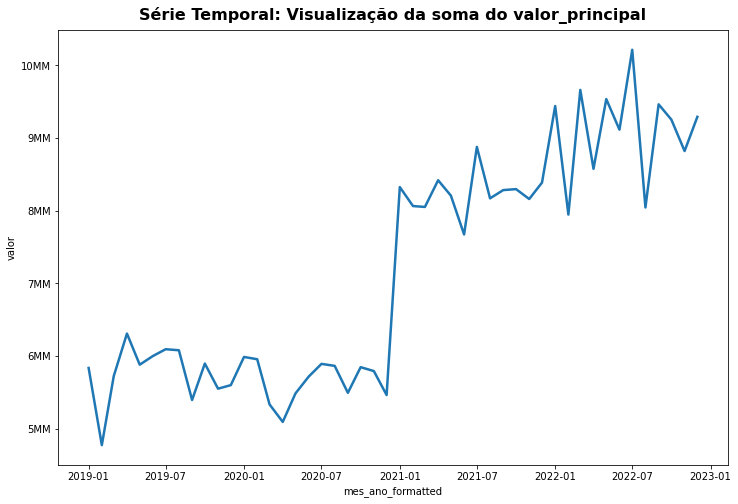

In [2]:
md.plotar_soma_linha_temporal(df=df)

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    Podemos notar que existiu uma mudança estrutural na série após 2021
  </p>
  <p>
    Para acoplar corretamente essa informação, criei uma dummy para distinguir esse período
  </p>
  <p>
    No futuro essa variável precisa continuar sendo 1
  </p>
</div>


In [2]:
df_arima = df.set_index('data_operacao')['valor_principal'].resample('1M').sum() ; df_arima.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='data_operacao', freq='M')

In [3]:
# Criando as covariáveis com o index do df_arima.index que são as datas que agrupamos anteriomente.

X = pd.DataFrame(index=df_arima.index)

# Criamos a variável dummy, única variável além da index no X, para acoplar a info de mudança na série.
X.loc[X.index < '2021','dummy'] = 0
X.fillna(1,inplace=True) ; X.head()

,dummy
data_operacao,
2019-01-31,0.0
2019-02-28,0.0
2019-03-31,0.0
2019-04-30,0.0
2019-05-31,0.0


<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>1. Avaliando a Correlações dos Resíduos</span>
</div>
<br><br>

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    * Para checar a correlação dos resíduos das covariáveis, fito uma Regressão Linear
  </p>
  <p>
    * Faço isso também para identificar o padrão dos resíduos da regressão
  </p>
  <p>
    * Identificar o padrão do Modelo ARIMA e a Presença de resíduos brancos 
  </p>
</div>


In [26]:
# Testando com uma regressão Linear pra checar a estrutura e a autocorrelação da regressão

# Adicionando o Intercepto, porque sem ele, não teríamos um resultado baseado na média.
X = sm.add_constant(X)

# Fitando a regressão Linear utilizando o df_arima e as covariáveis X.
model = sm.OLS(df_arima, X).fit()

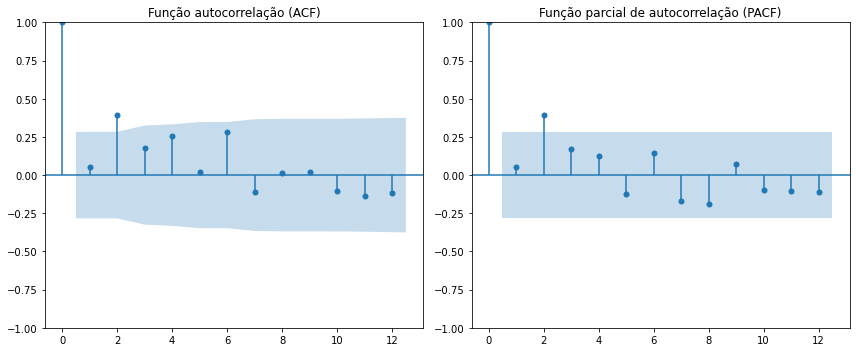

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(model.resid, lags=12, title='Função autocorrelação (ACF)', ax=ax1)
plot_pacf(model.resid, lags=12, title='Função parcial de autocorrelação (PACF)', ax=ax2)

plt.tight_layout()
plt.show()

<div style='color: #7EA5E9; text-align: left; font-size: 20px;'>
  <p>
    * É um processo autoregressivo de ordem 1
  </p>
  <p>
    * Esses gráficos mostram que não tem um padrão estrutural, é um resíduo branco
  </p>
  <p>
    * Vamos modelar supondo que os erros são residuso brancos
  </p>
  <p>
    * Assumo que o pulinho no 2 é uma correlação Spuria
  </p>
</div>


<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>2. Fitando o ARIMA</span>
</div>
<br><br>

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    * Fitamos o ARIMA com uma order de 0,0,0 devido a presença apenas de resíduos brancos
  </p>
  <p>
    * Usando a covariável X (Dummy) como exógena
  </p>
  <p>
    * Vamos modelar supondo que os erros são residuso brancos
  </p>
  <p>
    * Assumo que o pulinho no 2 é uma correlação Spuria
  </p>
</div>

<div style='color: #429F74; text-align: center; font-size: 20px;'>
  <p>
    Utilizando Log para controlar a Heterocedasticidade
  </p>
  <p>
    Por mais que prejudique os coefiecientes e os estimadores, controlar a variabilidade é chave.
  </p>
</div>

In [2]:
# Fitando o modelo ARIMA.

# Recriando as variáveis antes do fit da Regressão Linear:

# Fazendo um groupby utilizando o set_index e fazendo um resample mensal.
df_arima = df.set_index('data_operacao')['valor_principal'].resample('1M').sum()

# Recriando as Covariáveis.
X = pd.DataFrame(index=df_arima.index)
X.loc[X.index < '2021','dummy'] = 0
X.fillna(1,inplace=True)

model = sm.tsa.ARIMA(np.log(df_arima), exog=X,order=(0, 0, 0)) # 0,0,0 porque n encontramos sazonalidade ou padrões.
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:        valor_principal   No. Observations:                   48
Model:                          ARIMA   Log Likelihood                  61.109
Date:                Thu, 30 Nov 2023   AIC                           -116.217
Time:                        10:57:00   BIC                           -110.604
Sample:                    01-31-2019   HQIC                          -114.096
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5561      0.017    899.777      0.000      15.522      15.590
dummy          0.4174      0.023     17.837      0.000       0.372       0.463
sigma2         0.0046      0.001      4.034      0.0

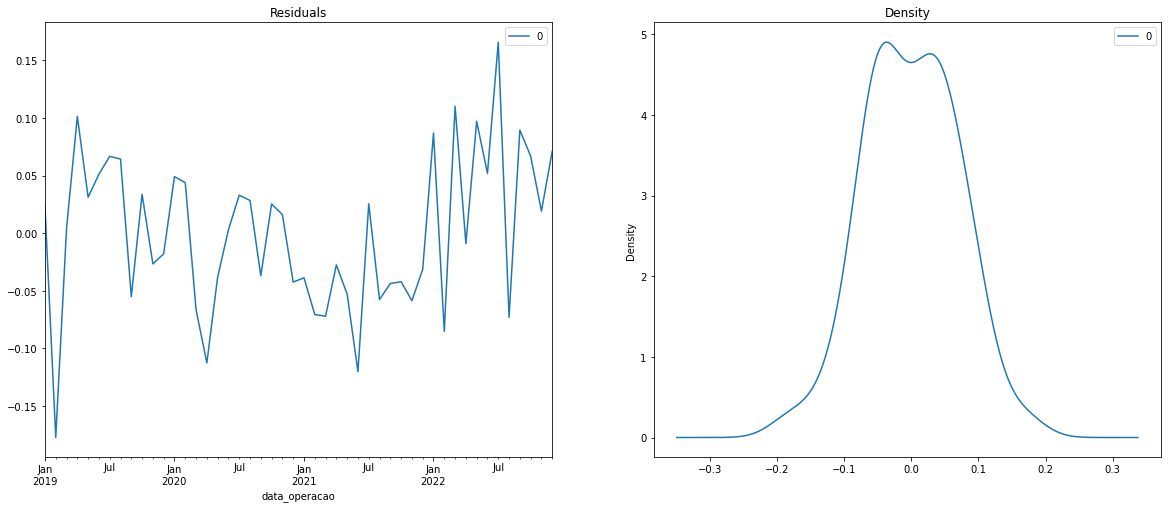

In [3]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2,figsize=(20,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [4]:
forecast_index = pd.date_range(start=df_arima.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
X_forecast = pd.DataFrame(index=forecast_index)
X_forecast['dummy'] = 1

# fc, se, conf = results.forecast(24,exog=X_forecast,alpha=0.05)
forecast_values = results.forecast(steps=24, exog=X_forecast, alpha=0.05)

In [5]:
forecast_values.tail().values == results.fittedvalues.tail().values

array([ True,  True,  True,  True,  True])

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>Testando com Train e Test</span>
</div>
<br><br>

In [6]:
# A ideia aqui é Splitar os dados em Treino e Teste e avaliar a projeção do modelo utilizando RMSE.

df_arima_2 = df.set_index('data_operacao')['valor_principal'].resample('1M').sum()

train = df_arima_2[:36]
test = df_arima_2[36:]

X2 = pd.DataFrame(index=train.index)
X2.loc[X2.index < '2021','dummy'] = 0
X2.fillna(1,inplace=True)

forecast_index2 = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
X_forecast2 = pd.DataFrame(index=forecast_index2)
X_forecast2['dummy'] = 1


model = sm.tsa.ARIMA(np.log(train), exog=X2,order=(0, 0, 0)) # 0,0,0 porque n encontramos sazonalidade ou padrões.
results = model.fit()
forecast_values_2 = results.forecast(12,exog=X_forecast2 ,alpha=0.05) 

fc_series = pd.Series(forecast_values_2, index=test.index)

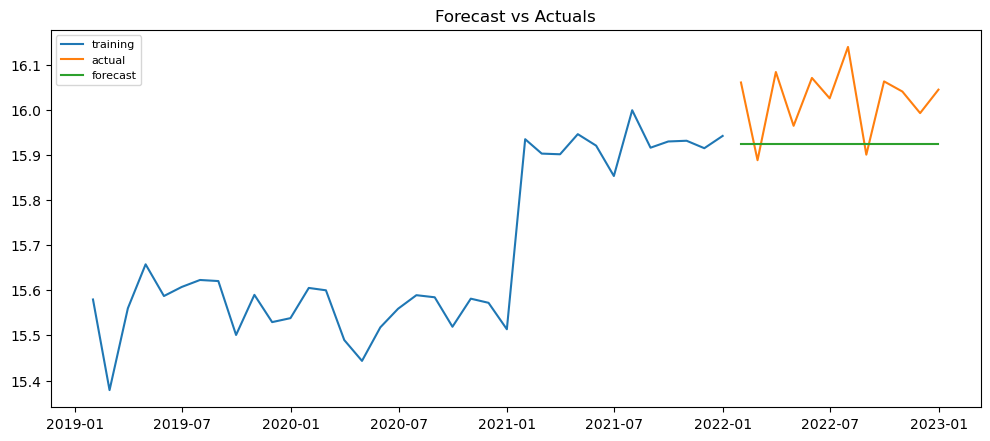

In [7]:
md.plotar_avaliacao_modelo(train=train,test=test,fc_series=fc_series)

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>Performance com RMSE</span>
</div>
<br><br>

In [13]:
# Mostrando o valor de RMSE
md.forecast_accuracy(forecast_values_2, np.log(test).values)['rmse']

0.12148862757268009

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>3. Plotando o modelo ARIMA</span>
</div>
<br><br>

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    * Modelo não é complexo por isso a curvatura "grosseira"
  </p>
  <p>
    * Isso acontece porque temos apenas ruídos brancos e a nossa saída é uma média
  </p>
</div>

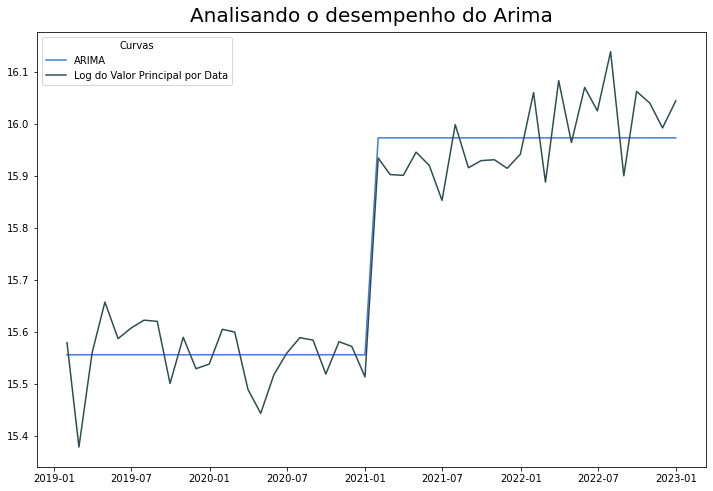

In [24]:
plt.subplots(figsize=(12,8))
plt.plot(results.fittedvalues,color='#437CDF',label='ARIMA')
plt.plot(np.log(df_arima),color='#2E4D50',label='Log do Valor Principal por Data')
plt.title('Analisando o desempenho do Arima',fontsize='20',pad=10)
plt.legend(title='Curvas')
plt.show()

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>4. Simulação de Monte Carlo e Plotagem Final</span>
</div>
<br><br>

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    * Para validar diversos cenários, utilizo a função simulate que utiliza do método de Monte Carlo
  </p>
  <p>
    * Faço a média das N simulações e ploto em um gráfico
  </p>
  <p>
    * Modelo probabilístico
  </p>
</div>

In [6]:
# Simulando 20 cenários possíveis, utilizando a exogena sempre como 1 (Devido ao que vimos anteriomente)

# 24 pois queremos saber para os proximos 2 anos. 

# Fazendo o np.exp para voltar a interpretação original dos resultados

# As colunas são as repetições e cada index é um mês diferente.

resultados = np.exp(results.simulate(24,exog=np.ones(24),anchor='end',repetitions=20)) ; resultados

valor_principal                                            \
                        0             1             2             3    
2023-01-31    8.832367e+06  8.305677e+06  8.449796e+06  8.032137e+06   
2023-02-28    7.846016e+06  8.946765e+06  8.875612e+06  8.821141e+06   
2023-03-31    7.954255e+06  7.985413e+06  8.694460e+06  7.979625e+06   
2023-04-30    9.330178e+06  9.086244e+06  8.866599e+06  8.773474e+06   
2023-05-31    8.895694e+06  8.809213e+06  8.680776e+06  8.721196e+06   
2023-06-30    8.018061e+06  9.462121e+06  8.237836e+06  8.392275e+06   
2023-07-31    8.783109e+06  7.574851e+06  8.988611e+06  8.485030e+06   
2023-08-31    9.551227e+06  7.966349e+06  8.724105e+06  8.971819e+06   
2023-09-30    9.216072e+06  7.332379e+06  8.284011e+06  8.508243e+06   
2023-10-31    8.984237e+06  8.276617e+06  9.181906e+06  9.092797e+06   
2023-11-30    8.754914e+06  8.000108e+06  9.264172e+06  8.197171e+06   
2023-12-31    9.428766e+06  9.112474e+06  7.599608e+06  8.370357e+06   
2024-01-31    9.139789e+06  9.042197e+06  7.913949e+06  8.664830e+06   
2024-02-29    8.080323e+06  8.792992e+06  8.264156e+06  8.536316e+06   
2024-03-31    8.797229e+06  8.967039e+06  8.355144e+06  8.750252e+06   
2024-04-30    9.388099e+06  8.480409e+06  8.896957e+06  8.203610e+06   
2024-05-31    8.947800e+06  8.468378e+06  8.107295e+06  9.421286e+06   
2024-06-30    9.123164e+06  9.336076e+06  9.660322e+06  7.803587e+06   
2024-07-31    8.260497e+06  9.332800e+06  8.426279e+06  9.751711e+06   
2024-08-31    8.862357e+06  8.683522e+06  8.913854e+06  9.099867e+06   
2024-09-30    7.820153e+06  9.218370e+06  8.531183e+06  7.954762e+06   
2024-10-31    8.184872e+06  8.675429e+06  9.403184e+06  9.037934e+06   
2024-11-30    8.578978e+06  8.057457e+06  7.863660e+06  8.969822e+06   
2024-12-31    8.118580e+06  9.180838e+06  8.133204e+06  9.224184e+06   

                                                                    \
                      4             5             6             7    
2023-01-31  8.315527e+06  8.030670e+06  8.500610e+06  8.961764e+06   
2023-02-28  9.237958e+06  8.410812e+06  1.003460e+07  9.051027e+06   
2023-03-31  9.086007e+06  9.029813e+06  8.227534e+06  9.673256e+06   
2023-04-30  8.546789e+06  8.785927e+06  8.581987e+06  9.273136e+06   
2023-05-31  8.377364e+06  9.462739e+06  9.047866e+06  8.715596e+06   
2023-06-30  1.051166e+07  9.445472e+06  8.661947e+06  8.179620e+06   
2023-07-31  7.771776e+06  9.020173e+06  8.550077e+06  8.407884e+06   
2023-08-31  8.962969e+06  9.021295e+06  8.561673e+06  8.656945e+06   
2023-09-30  9.000093e+06  8.386931e+06  8.020801e+06  9.500960e+06   
2023-10-31  7.833377e+06  8.244821e+06  8.474011e+06  8.041835e+06   
2023-11-30  7.887496e+06  9.497100e+06  8.058920e+06  9.071173e+06   
2023-12-31  9.417874e+06  8.579877e+06  7.780180e+06  8.980638e+06   
2024-01-31  9.007544e+06  8.374397e+06  7.999072e+06  8.969474e+06   
2024-02-29  7.934840e+06  7.936088e+06  8.572397e+06  8.169355e+06   
2024-03-31  9.277422e+06  8.123312e+06  9.175065e+06  9.065440e+06   
2024-04-30  8.247251e+06  8.569609e+06  9.227083e+06  8.494144e+06   
2024-05-31  9.827554e+06  9.273824e+06  8.402500e+06  8.315247e+06   
2024-06-30  9.650246e+06  9.068454e+06  9.393224e+06  8.507088e+06   
2024-07-31  8.446120e+06  9.276453e+06  8.301006e+06  9.041319e+06   
2024-08-31  7.924523e+06  8.816099e+06  9.157954e+06  8.518283e+06   
2024-09-30  8.753013e+06  8.121125e+06  8.700491e+06  8.653877e+06   
2024-10-31  8.488652e+06  9.613598e+06  9.748245e+06  8.478726e+06   
2024-11-30  8.479677e+06  8.020180e+06  8.707295e+06  9.147234e+06   
2024-12-31  8.422722e+06  9.044529e+06  8.798447e+06  7.883255e+06   

                                                                    \
                      8             9             10            11   
2023-01-31  8.513961e+06  9.032229e+06  8.713233e+06  9.621052e+06   
2023-02-28  9.960879e+06  8.922405e+06  8.931844e+06  8.734441e+06   
2023-03-31  8.555911e+06  8.198644e+0

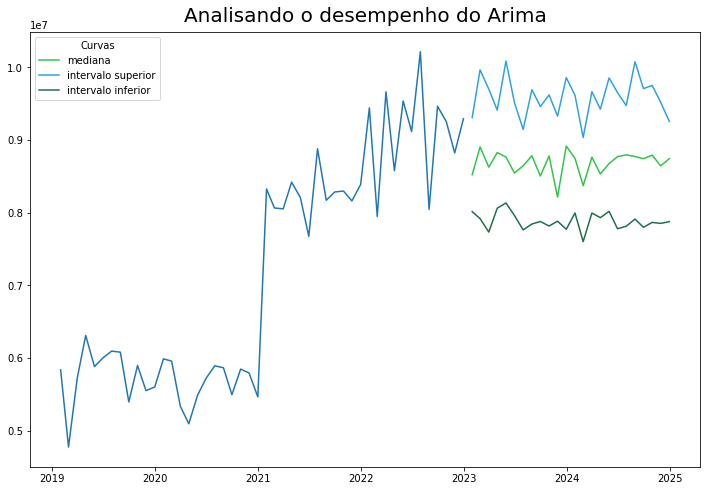

In [7]:
# Resultados variam de acordo com as simulações

# Interpretação na escala original

md.desempenho_modelo(resultados=resultados, df_arima=df_arima)

In [11]:
# Valores anuais de possiveis cenários que podem acontecer

resultados.resample('1y').sum()

valor_principal                                            \
                        0             1             2             3    
2023-12-31    1.055949e+08  1.008582e+08  1.038475e+08  1.023453e+08   
2024-12-31    1.033018e+08  1.062355e+08  1.024692e+08  1.054182e+08   

                                                                    \
                      4             5             6             7    
2023-12-31  1.049489e+08  1.059156e+08  1.025002e+08  1.065138e+08   
2024-12-31  1.044596e+08  1.042377e+08  1.061828e+08  1.032434e+08   

                                                                    \
                      8             9             10            11   
2023-12-31  1.071963e+08  1.017543e+08  1.013724e+08  1.067736e+08   
2024-12-31  1.029939e+08  1.011449e+08  1.056923e+08  1.092024e+08   

                                                                    \
                      12            13            14            15   
2023-12-31  1.081225e+08  1.009364e+08  1.060657e+08  1.042264e+08   
2024-12-31  1.068016e+08  1.007342e+08  1.028788e+08  1.061869e+08   

                                                                    
                      16            17            18            19  
2023-12-31  1.027225e+08  1.027650e+08  1.058787e+08  1.057395e+08  
2024-12-31  1.027595e+08  1.032472e+08  1.074523e+08  1.030918e+08

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Predição de volume de Contratos nos proximos 2 anos</span>
</div>
<br><br>

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>1. Refatorando o df_arima</span>
</div>
<br><br>

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    * Sabendo que cada Operação é um contrato diferente, utilizo para o agrupamento
  </p>
  <p>
    * Repito o mesmo processo anterior para o fit do ARIMA
  </p>
</div>

In [8]:
# Provando que existem apenas contratos unicos

df['contrato'].value_counts().reset_index()['contrato'].sum()

14895

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>2. Validando a Série de Contratos</span>
</div>
<br><br>

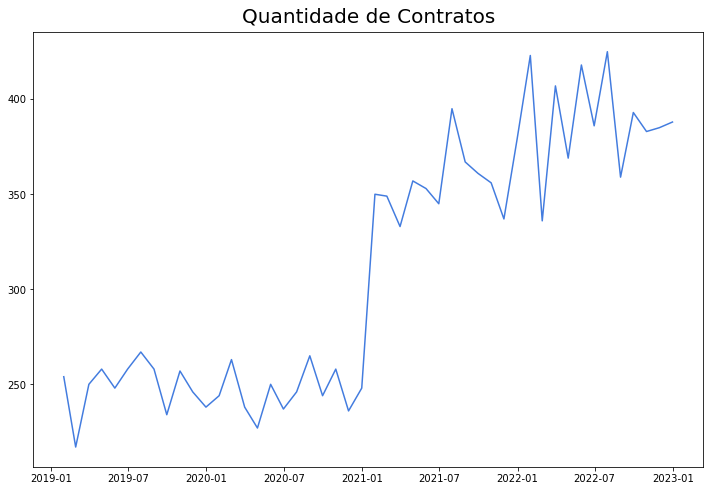

In [26]:
# Numero de contratos feitos por mes na operações de contratos de emprestimo
df_arima = df.groupby('data_operacao')['contrato'].count().resample('1M').sum()

plt.subplots(figsize=(12,8))
plt.plot(df_arima,color='#437CDF')
plt.title('Quantidade de Contratos',fontsize='20',pad=10)
plt.show()

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>3. Fitando o ARIMA</span>
</div>
<br><br>

In [10]:
# Baseado no resultado anterior, continuamos o ARIMA com a ordem de 0,0,0

# Fitando o modelo ARIMA

df_arima = df.groupby('data_operacao')['contrato'].count().resample('1M').sum()

X = pd.DataFrame(index=df_arima.index)
X.loc[X.index < '2021','dummy'] = 0
X.fillna(1,inplace=True)

# Uso a variável exogena porque temos essa quebra

model = sm.tsa.ARIMA(np.log(df_arima), exog=X,order=(0, 0, 0)) # 0,0,0 porque n encontramos sazonalidade ou padrões.
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               contrato   No. Observations:                   48
Model:                          ARIMA   Log Likelihood                  65.744
Date:                Thu, 30 Nov 2023   AIC                           -125.487
Time:                        10:58:30   BIC                           -119.874
Sample:                    01-31-2019   HQIC                          -123.366
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5104      0.016    342.732      0.000       5.479       5.542
dummy          0.4089      0.020     20.386      0.000       0.370       0.448
sigma2         0.0038      0.001      4.066      0.0

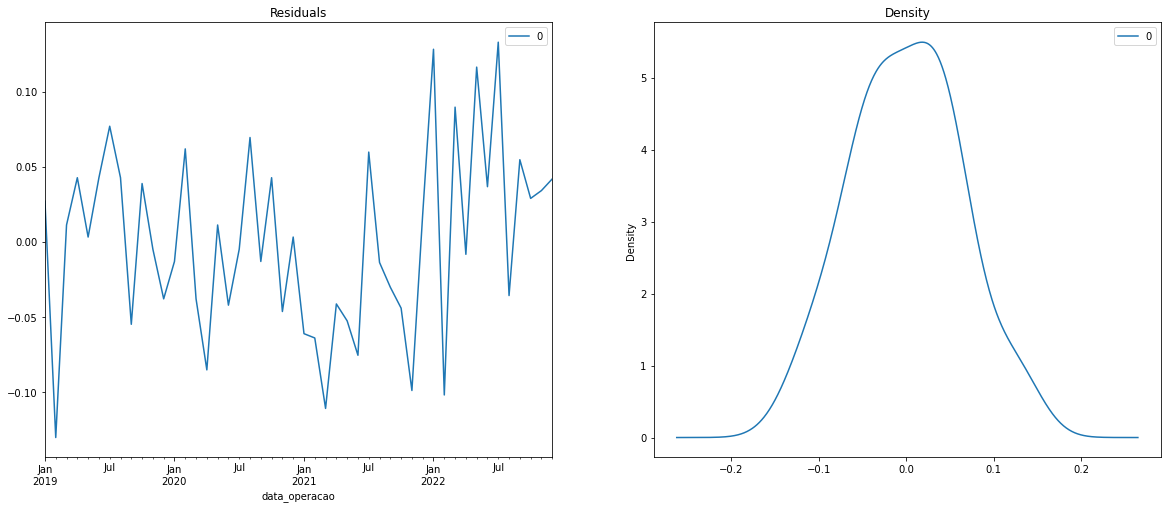

In [11]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2,figsize=(20,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>Testando com Train e Test</span>
</div>
<br><br>

In [12]:
# A ideia aqui é Splitar os dados em Treino e Teste e avaliar a projeção do modelo utilizando RMSE.

df_arima_2 = df.groupby('data_operacao')['contrato'].count().resample('1M').sum()

train = df_arima_2[:36]
test = df_arima_2[36:]

X2 = pd.DataFrame(index=train.index)
X2.loc[X2.index < '2021','dummy'] = 0
X2.fillna(1,inplace=True)

forecast_index2 = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
X_forecast2 = pd.DataFrame(index=forecast_index2)
X_forecast2['dummy'] = 1


model = sm.tsa.ARIMA(np.log(train), exog=X2,order=(0, 0, 0)) # 0,0,0 porque n encontramos sazonalidade ou padrões.
results = model.fit()
forecast_values_2 = results.forecast(12,exog=X_forecast2 ,alpha=0.05) 

fc_series = pd.Series(forecast_values_2, index=test.index)

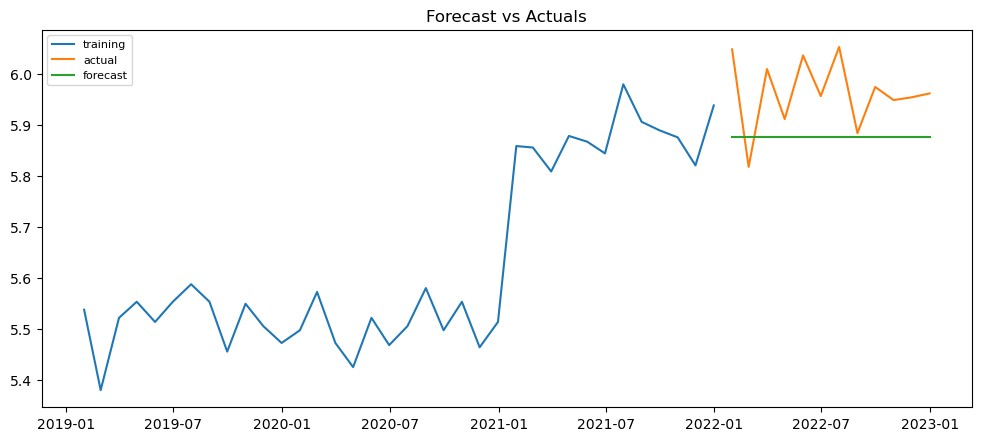

In [13]:
md.plotar_avaliacao_modelo(train=train,test=test,fc_series=fc_series)

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>Performance com RMSE</span>
</div>
<br><br>

In [14]:
md.forecast_accuracy(forecast_values_2, np.log(test).values)['rmse']

0.10880891903203023

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>4. Avaliando o desempenho do ARIMA</span>
</div>
<br><br>

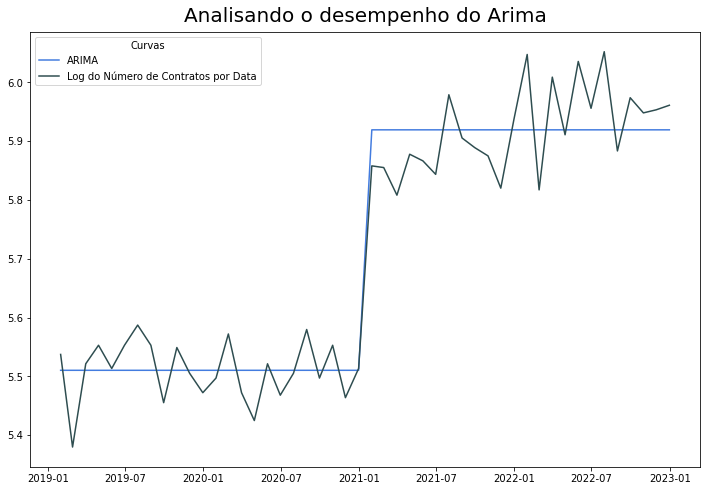

In [28]:
plt.subplots(figsize=(12,8))
plt.plot(results.fittedvalues,color='#437CDF',label='ARIMA')
plt.plot(np.log(df_arima),color='#2E4D50',label='Log do Número de Contratos por Data')
plt.title('Analisando o desempenho do Arima',fontsize='20',pad=10)
plt.legend(title='Curvas')
plt.show()

<br><br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 27px;'>📈</span>
  <span style='font-weight: bold; font-size: 27px; color: #3366FF;'>5. Simulação de Monte Carlo e Plotagem final</span>
</div>
<br><br>

In [29]:
resultados = np.exp(results.simulate(24,exog=np.ones(24),anchor='end',repetitions=20)) ; resultados

contrato                                                  \
                    0           1           2           3           4    
2023-01-31  442.805313  395.802598  375.339453  355.997283  363.130542   
2023-02-28  391.776822  384.748180  339.674311  345.469006  367.155653   
2023-03-31  389.130032  390.487295  346.160630  372.204377  395.008537   
2023-04-30  390.244246  437.786925  370.369109  381.867067  368.373482   
2023-05-31  397.577025  373.384898  369.791410  350.248235  421.191764   
2023-06-30  359.799547  376.768374  395.915594  337.291765  375.948578   
2023-07-31  338.225138  352.277822  387.023456  366.047669  386.239754   
2023-08-31  371.969241  345.108981  358.121000  359.643933  377.203173   
2023-09-30  390.478232  369.261445  388.128225  403.789742  359.199151   
2023-10-31  340.456154  427.628557  361.566513  382.438612  379.954308   
2023-11-30  388.574955  366.157094  371.051713  409.282021  338.906581   
2023-12-31  403.381785  377.891464  399.358375  381.818810  355.968072   
2024-01-31  373.752239  358.553775  353.282470  403.075768  334.986019   
2024-02-29  327.220534  384.870487  381.101600  388.755233  374.892847   
2024-03-31  370.485094  411.739695  388.708683  364.790121  348.457480   
2024-04-30  406.197491  354.218444  411.772421  369.367582  326.645920   
2024-05-31  403.313057  390.760811  357.930188  372.476423  350.814149   
2024-06-30  399.684144  364.385364  354.721114  359.718490  344.260309   
2024-07-31  348.494614  396.943219  378.017600  351.601481  341.438035   
2024-08-31  378.418040  360.975159  358.258955  338.386733  392.267893   
2024-09-30  362.229445  365.120467  362.714445  343.491401  375.775617   
2024-10-31  313.358310  357.957314  381.384454  420.387183  346.702590   
2024-11-30  372.930834  417.945082  375.302275  370.351002  357.509035   
2024-12-31  422.014101  435.196436  376.231115  330.294521  342.458197   

                                                                        \
                    5           6           7           8           9    
2023-01-31  335.273433  355.177832  387.834771  399.061631  360.593146   
2023-02-28  400.019523  384.070245  375.386808  350.509662  363.279032   
2023-03-31  381.226550  347.171727  393.302056  402.751748  378.168046   
2023-04-30  362.075024  402.274033  340.011166  359.271144  403.630026   
2023-05-31  358.078819  374.001981  328.176294  402.486871  357.337008   
2023-06-30  385.802787  375.697766  335.425650  342.108784  380.199554   
2023-07-31  402.185894  391.061527  357.898494  394.479504  402.839569   
2023-08-31  391.330177  382.189510  380.733240  380.980759  381.453839   
2023-09-30  370.152117  321.327712  417.623204  361.278582  350.197814   
2023-10-31  379.298231  351.774884  370.781411  398.857647  363.077340   
2023-11-30  363.873671  378.857186  391.963987  347.200349  365.267618   
2023-12-31  428.202279  399.153802  348.577037  357.111900  410.893360   
2024-01-31  370.226701  396.801217  379.590264  377.253443  357.683328   
2024-02-29  348.999397  400.278331  413.905609  402.730201  338.180204   
2024-03-31  348.620678  371.491495  336.235001  362.972536  330.309864   
2024-04-30  349.721204  395.228645  406.531081  335.274088  373.327489   
2024-05-31  368.373357  358.453865  354.892777  364.260206  379.604165   
2024-06-30  404.797019  359.248976  391.565364  364.805888  388.581387   
2024-07-31  370.752292  352.795618  379.042299  363.703369  357.551595   
2024-08-31  386.255384  388.591845  369.765165  387.104003  388.607997   
2024-09-30  330.291604  362.559029  356.314290  347.598090  379.477793   
2024-10-31  375.915882  363.190052  372.466242  395.181756  369.428854   
2024-11-30  399.198780  373.315544  378.803957  355.663551  402.611127   
2024-12-31  361.535525  383.111270  335.854771  391.299244  350.784398   

                                                                        \
                    10          11          12          13          14   
2023-01-31  382.

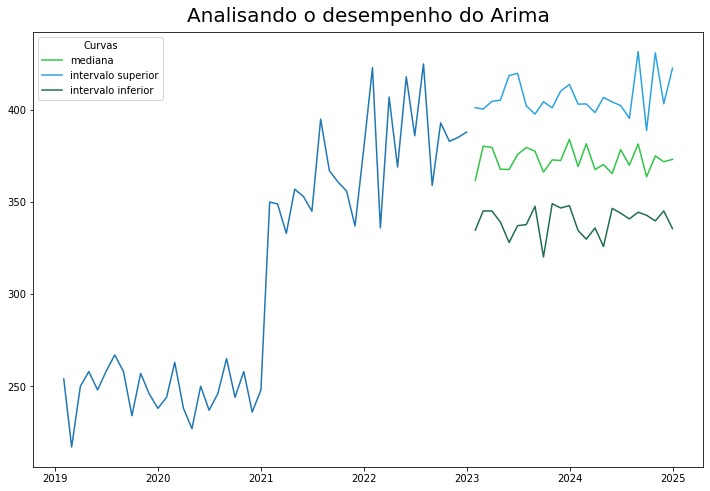

In [31]:
# Interpretação na escala original

md.desempenho_modelo(resultados=resultados,df_arima=df_arima)

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: normal; font-size: 32px; color: #3366FF;'>Conclusões e Finalizações</span>
</div>
<br><br>

<div style='color: #7EA5E9; text-align: center; font-size: 20px;'>
  <p>
    Concluímos todo o teste aqui.
  </p>
  <p>
    Gostaria de apresentar toda a minha animação e vontade com essa vaga do PB, 
    desenvolvi esse teste técnico com a intenção de demonstrar tanto esse meu desejo
    quanto os meus conhecimentos e bagagens que adquiri durante todo meu processo de aprendizagem
  </p>
  <br><br><br>
  <p>
    <strong>
      <span style="font-size: larger;">
        Mas sem dúvida, um dos meus principais desejos é aprender com vocês!
      </span>
    </strong>
  </p>
  <br><br><br>
  <p style="color: #4FDBB1;">
    Aguardo com muita animação o retorno de vocês.
  </p>
  <p style="color: #4FDBB1;">
    Obrigado pela oportunidade @Lucas @Daniel @Gisele
  </p>
</div>